# Statistika Deskriptif dan Visualisasi

In [2]:
#import packages libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from datetime import datetime
from scipy import stats
from sklearn.preprocessing import StandardScaler
from pandas_profiling import ProfileReport

In [3]:
#import dataset after cleaning & preprocessing
dataset = pd.read_excel('dataset visualisasi.xlsx')

In [5]:
dataset.head(10)

,Gudang,Kode Pelanggan,Kategori Pelanggan,Kode Produk,Kategori Produk,Tanggal,No.Transaksi,Qty,Harga Bruto,Qty Trans,Harga Bruto Trans
0,GGS,3170950,GRO,WJ-CHY-SP-12-SDR13,WAJAN,2018-09-01 00:00:00,2.83-180306.1125-504,3.0,18000,1.098612,134.164079
1,GGS,3170950,GRO,WJ-CHY-SP-16-SDR13,WAJAN,2018-09-01 00:00:00,2.83-180306.1125-504,3.0,33500,1.098612,183.030052
2,GGS,3170950,GRO,WJ-CHY-SP-18-SDR13,WAJAN,2018-09-01 00:00:00,2.83-180306.1125-504,3.0,48500,1.098612,220.227156
3,GGS,3170950,GRO,WJ-CHY-SP-22-SDR13,WAJAN,2018-09-01 00:00:00,2.83-180306.1125-504,3.0,65000,1.098612,254.950976
4,GGS,3170950,GRO,WJ-CHY-SP-20-SDR13,WAJAN,2018-09-01 00:00:00,2.83-180306.1125-504,3.0,55000,1.098612,234.520788
5,GGS,3170950,GRO,WJ-CHY-SP-24-SDR13,WAJAN,2018-09-01 00:00:00,2.83-180306.1125-504,1.0,105000,0.000000,324.037035
6,GGS,3170950,GRO,WJ-CHY-SP-28-SDR13,WAJAN,2018-09-01 00:00:00,2.83-180306.1125-504,1.0,192500,0.000000,438.748219
7,GGS,3170950,GRO,TONG-196001,TONG,2018-09-01 00:00:00,2.83-180306.1125-504,0.5,417000,-0.693147,645.755372
8,GGS,3170950,GRO,TONG-196001,TONG,2018-09-01 00:00:00,2.83-180306.1125-504,3.0,35000,1.098612,187.082869
9,GGS,3170950,GRO,TIMBA-TC14-WS-HJ,TIMBA,2018-09-01 00:00:00,2.83-180306.1125-504,3.0,66000,1.098612,256.904652


In [7]:
print(dataset.describe())

                 Qty    Harga Bruto      Qty Trans  Harga Bruto Trans
count  430151.000000  430151.000000  430151.000000      430151.000000
mean        1.456851  103756.868395       0.210219         267.985807
std         0.942940  128775.969838       0.554101         178.719193
min         0.500000       0.000000      -0.693147           0.000000
25%         1.000000   18000.000000       0.000000         134.164079
50%         1.000000   50000.000000       0.000000         223.606798
75%         2.000000  132500.000000       0.693147         364.005494
max         5.500000  604000.000000       1.704748         777.174369


In [8]:
dataset["Kategori Produk"].unique()

array(['WAJAN', 'TONG', 'TIMBA', 'CORONG', 'LOYANG', 'BOTOL', 'ESKAN',
       'CEL', 'SKOPSMP', 'KRJG', 'POT-B', 'TGKPEL', 'DD', 'AKS', 'RAK',
       'THERMOS', 'GTGN', 'TRPL', 'MOK', 'LEM', 'PANCI', 'KASUR',
       'SETRIKA', 'PIRING', 'MANGKO', 'SENDOK', 'KOMPOR', 'SAPU', 'KIPAS',
       'JEPITAN', 'BLENDER', 'BOX', 'TNG', 'PGGN', 'JUMBO', 'RBUC',
       'BAKI', 'KRS', 'GELAS', 'RTG', 'PISAU', 'GAYUNG', 'PAYUNG',
       'CANGKIR', 'WAKUL', 'T4SRT', 'TOPLES', 'TIKAR', 'T4RT', 'MCM',
       'KAKI-DIS', 'SIKAT', 'ALAS', 'DADARAN', 'T4SDK', 'TAS', 'BASI',
       'BANGKU', 'MCGG', 'SELANG', 'REG', 'KEMUCING', 'SERBET', 'CET',
       'TUTUP', 'KTK', 'BASKOM', 'HS', 'T4PNS', 'TAPISAN', 'T4TISS',
       'STDGLS', 'SPRT', 'DISP', 'PRAS', 'LANGS', 'GILINGAN', 'FURNITUR',
       'POMPA', 'KOCOKAN', 'SUMBU', 'BKBTL', 'TST', 'BKS-MK', 'JAM',
       'PARUTAN', 'KTK-MKN', 'SISIRU', 'KOB', 'PANSTOVE', 'BANGUL',
       'MIXER', 'TIMBANGA', 'EMBER', 'JERGEN', 'BINGKAI', 'PERIUK', 'RB',
       'TOLA-AI

In [62]:
#The most sold product categories
df = dataset[['Kategori Produk','Qty']].groupby(['Kategori Produk'])['Qty'].sum().reset_index(name='sum').sort_values(['sum'], ascending=False).head(10)
print(df)

    Kategori Produk       sum
77           LOYANG  35308.00
164           WAJAN  28247.50
37            GELAS  24480.54
96           PIRING  24220.00
156          TOPLES  18286.50
142             TAS  18089.00
112          SENDOK  18074.00
100           POT-B  17153.00
28               DD  16168.00
163           WADAH  15678.50


In [63]:
#convert to dataframe
data = pd.DataFrame(df)
print(data)

    Kategori Produk       sum
77           LOYANG  35308.00
164           WAJAN  28247.50
37            GELAS  24480.54
96           PIRING  24220.00
156          TOPLES  18286.50
142             TAS  18089.00
112          SENDOK  18074.00
100           POT-B  17153.00
28               DD  16168.00
163           WADAH  15678.50


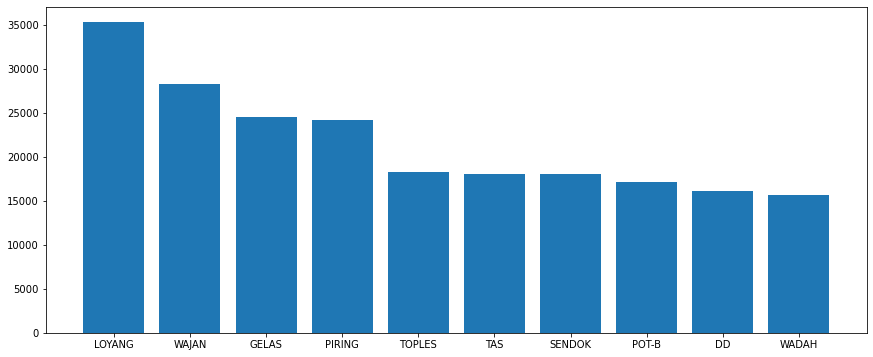

In [65]:
#visualize with bar plot
names = data["Kategori Produk"]
values = data["sum"]

plt.figure(figsize=(50, 6))
plt.title("Penjualan Terbanyak", fontsize = 16)
plt.xlabel ('Kategori Produk')
plt.ylabel('Banyak Penjualan')

plt.subplot(131)
plt.bar(names, values)
plt.show()

In [6]:
dataset.nunique()

Gudang                    3
Kode Pelanggan         5704
Kategori Pelanggan        4
Kode Produk            4663
Kategori Produk         167
Tanggal                 333
No.Transaksi          91774
Qty                      64
Harga Bruto            1269
Qty Trans                64
Harga Bruto Trans      1269
dtype: int64

In [20]:
#Aggregate spendings from every customer category
dataset.groupby(['Kategori Pelanggan'])['Harga Bruto'].sum()

Kategori Pelanggan
GRO       31416178119
HTRSTO      693088538
LGGN       4895343244
UMUM       7626510796
Name: Harga Bruto, dtype: int64

In [21]:
dataset['Kategori Pelanggan'].unique()

array(['GRO', 'UMUM', 'LGGN', 'HTRSTO'], dtype=object)

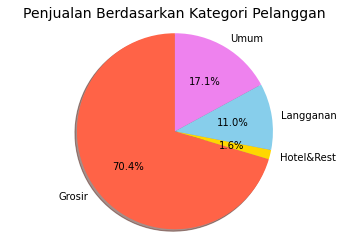

In [126]:
#pie chart to see the proportion of income from each customer category
labels = 'Grosir', 'Hotel&Rest', 'Langganan', 'Umum'
penjualan = [31416178119, 693088538, 4895343244, 7626510796]
explode = (0, 0, 0, 0) 

fig1, ax1 = plt.subplots()
ax1.pie(penjualan, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, colors = ['tomato', 'gold', 'skyblue','violet','lime'])
ax1.set_title('Penjualan Berdasarkan Kategori Pelanggan', fontsize=14)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [158]:
#dataframe for GGS branch
ggs_df = dataset[dataset['Gudang'] == 'GGS']
ggs = pd.DataFrame(ggs_df)
ggs.head(5)

,Gudang,Kode Pelanggan,Kategori Pelanggan,Kode Produk,Kategori Produk,Tanggal,No.Transaksi,Qty,Harga Bruto,Qty Trans,Harga Bruto Trans
0,GGS,3170950,GRO,WJ-CHY-SP-12-SDR13,WAJAN,2018-09-01 00:00:00,2.83-180306.1125-504,3.0,18000,1.098612,134.164079
1,GGS,3170950,GRO,WJ-CHY-SP-16-SDR13,WAJAN,2018-09-01 00:00:00,2.83-180306.1125-504,3.0,33500,1.098612,183.030052
2,GGS,3170950,GRO,WJ-CHY-SP-18-SDR13,WAJAN,2018-09-01 00:00:00,2.83-180306.1125-504,3.0,48500,1.098612,220.227156
3,GGS,3170950,GRO,WJ-CHY-SP-22-SDR13,WAJAN,2018-09-01 00:00:00,2.83-180306.1125-504,3.0,65000,1.098612,254.950976
4,GGS,3170950,GRO,WJ-CHY-SP-20-SDR13,WAJAN,2018-09-01 00:00:00,2.83-180306.1125-504,3.0,55000,1.098612,234.520788


In [159]:
print(ggs.describe())

                 Qty    Harga Bruto      Qty Trans  Harga Bruto Trans
count  329881.000000  329881.000000  329881.000000      329881.000000
mean        1.537991  119457.642795       0.245809         295.292784
std         1.011012  135282.223916       0.594649         179.610446
min         0.500000       0.000000      -0.693147           0.000000
25%         1.000000   25500.000000       0.000000         159.687194
50%         1.000000   65000.000000       0.000000         254.950976
75%         2.000000  162500.000000       0.693147         403.112887
max         5.500000  604000.000000       1.704748         777.174369


In [92]:
#most sold product categories in GGS branch
df_for_ggs = ggs[['Kategori Produk','Qty']].groupby(['Kategori Produk'])['Qty'].sum().reset_index(name='sum').sort_values(['sum'], ascending=False).head(10)
print(df_for_ggs)

    Kategori Produk      sum
77           LOYANG  29932.0
162           WAJAN  26800.5
96           PIRING  20057.0
37            GELAS  18164.5
28               DD  14817.5
65           KOMPOR  13561.0
112          SENDOK  13476.5
154          TOPLES  12837.0
102             RAK  12742.0
100           POT-B  12641.5


In [93]:
#convert the sorted data into dataframe
dataggs = pd.DataFrame(df_for_ggs)
print(dataggs)

    Kategori Produk      sum
77           LOYANG  29932.0
162           WAJAN  26800.5
96           PIRING  20057.0
37            GELAS  18164.5
28               DD  14817.5
65           KOMPOR  13561.0
112          SENDOK  13476.5
154          TOPLES  12837.0
102             RAK  12742.0
100           POT-B  12641.5


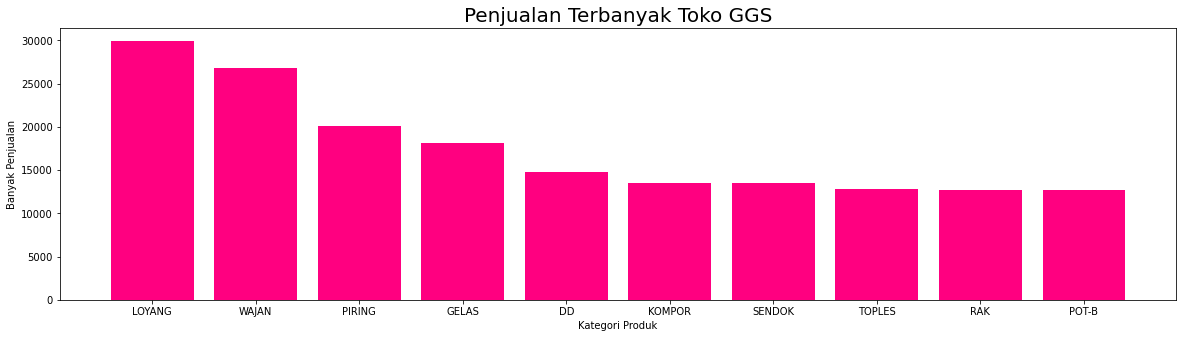

In [148]:
#Visualize with bar chart
names = dataggs["Kategori Produk"]
values = dataggs["sum"]

plt.figure(figsize=(20, 5))
plt.title("Penjualan Terbanyak Toko GGS", fontsize = 20)
plt.xlabel ("Kategori Produk", fontsize = 10)
plt.ylabel("Banyak Penjualan", fontsize = 10)

plt.bar(names, values, color = (1, 0, 0.5, 1))
plt.show()

In [156]:
#dataframe for GHL branch
ghl_df = dataset[dataset['Gudang'] == 'GHL']
ghl = pd.DataFrame(ghl_df)
ghl.head(5)

,Gudang,Kode Pelanggan,Kategori Pelanggan,Kode Produk,Kategori Produk,Tanggal,No.Transaksi,Qty,Harga Bruto,Qty Trans,Harga Bruto Trans
339637,GHL,UMUM,UMUM,TOP-PLAS-0004-KH01,TOPLES,2018-09-01 00:00:00,2.50-180827.0905-156,1.0,3500,0.0,59.160798
339638,GHL,UMUM,UMUM,WJ-060003,WAJAN,2018-09-01 00:00:00,2.50-180827.0907-157,1.0,179500,0.0,423.674403
339639,GHL,UMUM,UMUM,EROS-RJ-BSR,SENDOK,2018-09-01 00:00:00,2.50-180827.0856-156,1.0,9000,0.0,94.868330
339640,GHL,UMUM,UMUM,TOP-PLAS-0004-KH01,TOPLES,2018-09-01 00:00:00,2.50-180827.0856-156,1.0,3500,0.0,59.160798
339641,GHL,UMUM,UMUM,LOY-R-12-DMI01,LOYANG,2018-09-01 00:00:00,2.50-180827.0856-156,1.0,7500,0.0,86.602540


In [157]:
print(ghl.describe())

                Qty    Harga Bruto     Qty Trans  Harga Bruto Trans
count  90514.000000   90514.000000  90514.000000       90514.000000
mean       1.187788   52252.039497      0.092106         178.373326
std        0.595037   86248.516308      0.366886         142.951816
min        0.500000       1.000000     -0.693147           1.000000
25%        1.000000    7500.000000      0.000000          86.602540
50%        1.000000   20500.000000      0.000000         143.178211
75%        1.000000   55000.000000      0.000000         234.520788
max        5.500000  601000.000000      1.704748         775.241898


In [96]:
#most sold product categories in GHL branch
df_for_ghl = ghl[['Kategori Produk','Qty']].groupby(['Kategori Produk'])['Qty'].sum().reset_index(name='sum').sort_values(['sum'], ascending=False).head(10)
print(df_for_ghl)

    Kategori Produk      sum
99              TAS  9913.00
30            GELAS  5930.04
55           LOYANG  4758.00
107          TOPLES  4579.50
84           SENDOK  4217.00
75            POT-B  4169.00
71           PIRING  3738.50
56           MANGKO  3112.00
48             KRJG  3003.50
110           WADAH  2989.50


In [97]:
#convert the sorted data into dataframe
dataghl = pd.DataFrame(df_for_ghl)
print(dataghl)

    Kategori Produk      sum
99              TAS  9913.00
30            GELAS  5930.04
55           LOYANG  4758.00
107          TOPLES  4579.50
84           SENDOK  4217.00
75            POT-B  4169.00
71           PIRING  3738.50
56           MANGKO  3112.00
48             KRJG  3003.50
110           WADAH  2989.50


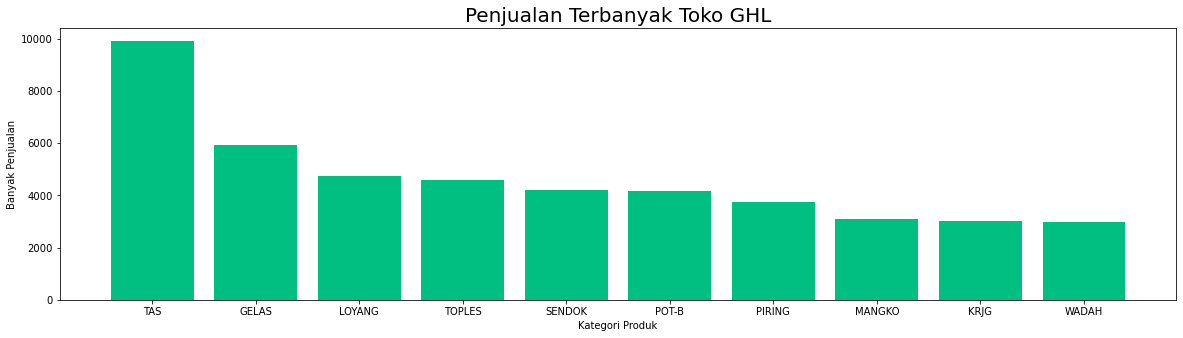

In [149]:
#Visualize with bar chart
names = dataghl["Kategori Produk"]
values = dataghl["sum"]

plt.figure(figsize=(20, 5))
plt.title("Penjualan Terbanyak Toko GHL", fontsize = 20)
plt.xlabel ("Kategori Produk", fontsize = 10)
plt.ylabel("Banyak Penjualan", fontsize = 10)

plt.bar(names, values, color = (0, 0.75, 0.5, 1))
plt.show()

In [163]:
#dataframe for GHI branch
ghi_df = dataset[dataset['Gudang'] == 'GHI']
ghi = pd.DataFrame(ghi_df)
ghi.head(5)

,Gudang,Kode Pelanggan,Kategori Pelanggan,Kode Produk,Kategori Produk,Tanggal,No.Transaksi,Qty,Harga Bruto,Qty Trans,Harga Bruto Trans
329881,GHI,UMUM,UMUM,CEL-KAL-JUMBO-NP,CEL,2018-09-01 00:00:00,2.56-180807.0848-149,1.0,11750,0.000000,108.397417
329882,GHI,UMUM,UMUM,CEL-KAL-XL,CEL,2018-09-01 00:00:00,2.56-180807.0848-149,1.0,13000,0.000000,114.017543
329883,GHI,UMUM,UMUM,SKTKAIN-0007-SDR13,SIKAT,2018-09-01 00:00:00,2.56-180807.0848-149,1.0,7750,0.000000,88.034084
329884,GHI,UMUM,UMUM,KESET-0099-STJ15,ALAS,2018-09-01 00:00:00,2.56-180807.0848-149,2.0,10000,0.693147,100.000000
329885,GHI,UMUM,UMUM,SAPU-0458-SDR13,SAPU,2018-09-01 00:00:00,2.56-180807.0848-149,1.0,61000,0.000000,246.981781


In [169]:
print(ghi.describe())

               Qty    Harga Bruto    Qty Trans  Harga Bruto Trans
count  9756.000000    9756.000000  9756.000000        9756.000000
mean      1.209538   50714.732575     0.102615         176.055822
std       0.632858   87020.749866     0.384606         140.431840
min       0.500000       0.000000    -0.693147           0.000000
25%       1.000000    8500.000000     0.000000          92.195445
50%       1.000000   20000.000000     0.000000         141.421356
75%       1.000000   50000.000000     0.000000         223.606798
max       5.500000  600000.000000     1.704748         774.596669


In [165]:
#most sold product categories in GHI branch
df_for_ghi = ghi[['Kategori Produk','Qty']].groupby(['Kategori Produk'])['Qty'].sum().reset_index(name='sum').sort_values(['sum'], ascending=False).head(10)
print(df_for_ghi)

    Kategori Produk     sum
97              TAS  972.00
105          TOPLES  870.00
55           LOYANG  618.00
69           PERLAK  460.25
71           PIRING  424.50
14            BOTOL  392.50
30            GELAS  386.00
83           SENDOK  380.50
75            POT-B  342.50
108           WADAH  301.00


In [166]:
#convert the sorted data into dataframe
dataghi = pd.DataFrame(df_for_ghi)
print(dataghi)

    Kategori Produk     sum
97              TAS  972.00
105          TOPLES  870.00
55           LOYANG  618.00
69           PERLAK  460.25
71           PIRING  424.50
14            BOTOL  392.50
30            GELAS  386.00
83           SENDOK  380.50
75            POT-B  342.50
108           WADAH  301.00


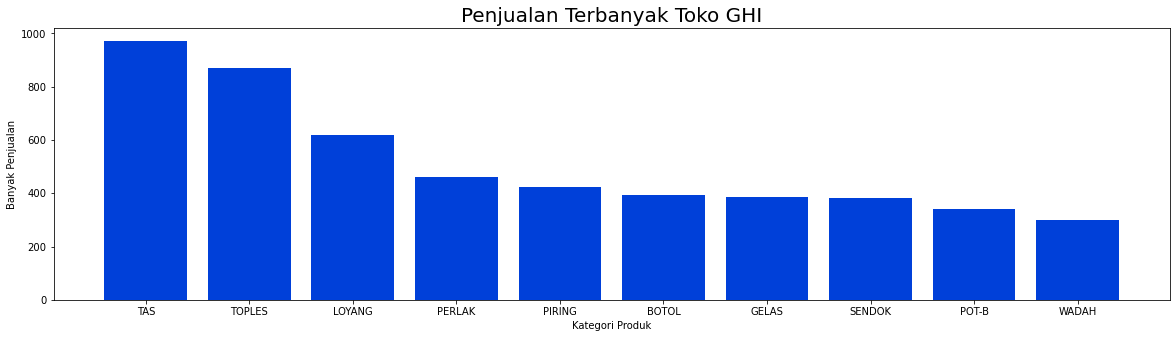

In [168]:
#Visualize with bar chart
names = dataghi["Kategori Produk"]
values = dataghi["sum"]

plt.figure(figsize=(20, 5))
plt.title("Penjualan Terbanyak Toko GHI", fontsize = 20)
plt.xlabel ("Kategori Produk", fontsize = 10)
plt.ylabel("Banyak Penjualan", fontsize = 10)

plt.bar(names, values, color = (0, 0.25, 0.85, 1))
plt.show()

In [180]:
#import RFM dataset
df2 = pd.read_excel('final.xlsx')
df2.head()
df2 = df2.sample(n=150, random_state=15)

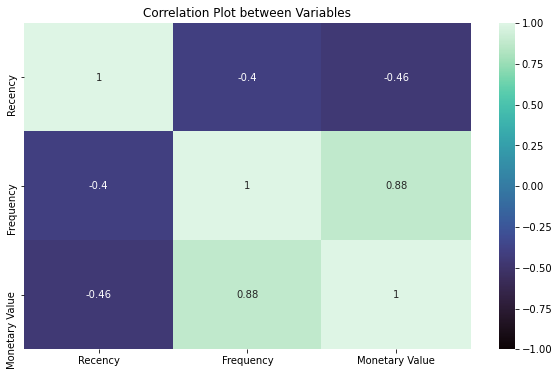

In [181]:
plt.figure(figsize = (10, 6))
sns.heatmap(df2.corr(),vmin=-1, vmax=1, center=0, annot = True, cmap="mako")
plt.title("Correlation Plot between Variables")
plt.show()

In [4]:
#Additional exploration
profile = ProfileReport(dataset, title="Pandas Profiling Report 2", explorative=True)

profile.to_file("Report Profiling 2.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]